In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Exploratory Analysis on Constructor and Group in Car Racing

## Data Preparation

In [41]:
f1_results = pd.read_csv('data/results.csv')
f1_races = pd.read_csv('data/races.csv')
f1_constructor = pd.read_csv('data/constructors.csv')
fe_results = pd.read_csv('data/formula_e_race_results.csv')

In [42]:
f1_results['position'] = f1_results['position'].replace('\\N',0)
f1_results['position'] = f1_results['position'].astype(int)

## Constructor winners in F1 and FE

In [43]:
f1_results_latest10 = f1_results[f1_results['raceId']>=860]
f1_results_latest10_Winner = f1_results_latest10[f1_results_latest10['position']<=3]
f1_results_latest10_Winner_withcon = f1_results_latest10_Winner.merge(f1_constructor,on='constructorId')

<AxesSubplot:title={'center':'F-1 Car Constructor Win Times During Last 10 Years'}>

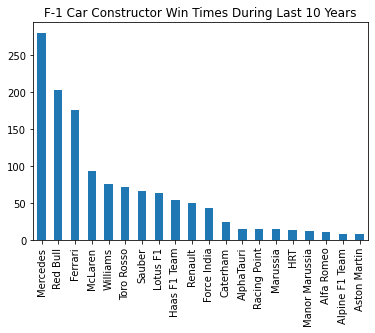

In [44]:
f1_results_latest10_Winner_withcon['name'].value_counts().plot.bar(title = "F-1 Car Constructor Win Times During Last 10 Years")

<AxesSubplot:title={'center':'F-E Car Group Win Times in Recent 8 Years'}>

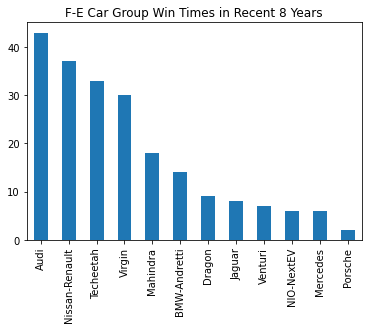

In [45]:
fe_winners = fe_results.iloc[0:213]
fe_winners['team_group'].value_counts().plot.bar(title = "F-E Car Group Win Times in Recent 8 Years")

In [46]:
f1_results_latest10_Winner_withrace = f1_results_latest10_Winner.merge(f1_races, on = 'raceId')
f1_results_latest10_Winner_onlyIDandYear = f1_results_latest10_Winner_withrace[['constructorId','year']]

<AxesSubplot:xlabel='year,constructorId'>

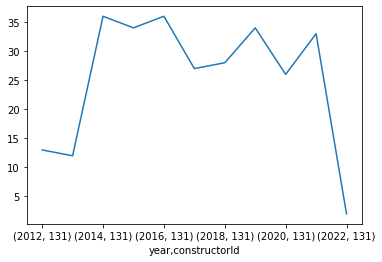

In [47]:
#For Mercedes
f1_results_latest10_Winner_onlyIDandYear[f1_results_latest10_Winner_onlyIDandYear['constructorId'] == 131].groupby('year').value_counts().plot.line()

<AxesSubplot:xlabel='year,constructorId'>

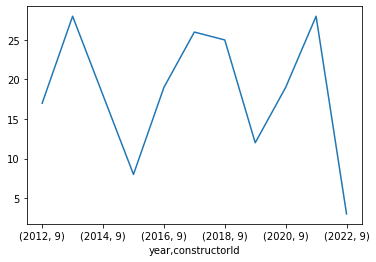

In [48]:
#For Red Bull
f1_results_latest10_Winner_onlyIDandYear[f1_results_latest10_Winner_onlyIDandYear['constructorId'] == 9].groupby('year').value_counts().plot.line()

<AxesSubplot:xlabel='year,constructorId'>

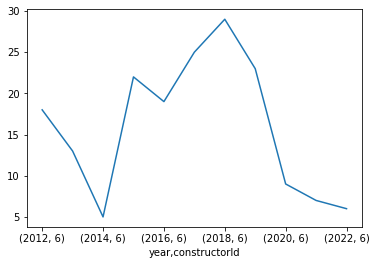

In [49]:
# For Ferrari
f1_results_latest10_Winner_onlyIDandYear[f1_results_latest10_Winner_onlyIDandYear['constructorId'] == 6].groupby('year').value_counts().plot.line()